<a href="https://colab.research.google.com/github/pritesh2292/play-store-app-review-analysis/blob/main/Copy_of_Team_Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <B> Play Store App Review Data Analysis

# Introduction

We have Explore the given data from the almabetter to do our capstone project of EDA of Google Play Store data and User reviews data, in this we clean the raw data and visualize the given data to understand it better way


We will also answer some few question:

1. How many apps in each category?
2. How many ratings are getting for the apps give it's relation?
3. Which content rating is having higher number of apps?
4. Which are the top categories in Play Store?
5. What is percentage of the paid and free apps?
6. Which are the top 10 expensive apps?
7. What is relation between rating and it's affecting factors?
8. What are the Top 10 installed apps in any category?
9. Which App has higher number of reviews?
10. Which apps giving the highest earning?
11. What is average rating of the App in Playstore?
12. From avg rating of app can we group as Top rated, Above average, Average, Below average?
13. What is percentage of the user review sentiments?
14. Which app has higher number of positive review?
15. Which app has higher number of the negative review?

In [ ]:
# Importing necessery libraries for the dataset analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# we mount the google drive for reading csv file provided by Almabetter
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# using pandas library and 'read_csv' function to read 'Play Store Data' csv file as file already formated for us from Almabetter
playstore_data_path = '/content/drive/MyDrive/Copy of Play Store Data.csv'
df=pd.read_csv(playstore_data_path)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# we check the top and bottom values from the given dataset
df.head(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
df.tail(15)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [ ]:
# check the info from the Dataset to know basic of the column and its format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the data frame, we know that:

1. There are 13 columns of properties with 10841 rows of data.
2. Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'. 
3. Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'. 
4. Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'. 
5. Values of column 'Price' are strings representing price with symbol '$'.  


Hence, we will need to do some data cleaning.

In [ ]:
#check the columns labels
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#<B> Understanding, Data Wrangling and Cleaning

In [ ]:
#check is there duplictes in the given dataset and delete it.
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# we check the rows no for the respective column
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

 As we can se there are some value is missing in some column that is it might be the null values 

In [ ]:
# need to find out the what columns have null values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We have seen the information of the given data there is Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'. That must be in numeric form either int or float for that we need to find outlier.

In [ ]:
# lets start with 'Price' coulmn
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [ ]:
# there is special character in the coulmn 'Price' need to correct it
# there is 'Everyone' at 10472 in price column that need to replace in int
df['Price'] = df.Price.apply(lambda x: x.strip('$'))
df['Price'] = df.Price.replace('Everyone', np.NaN)

In [ ]:
#convert price in numeric

df['Price'] = pd.to_numeric(df['Price'])

In [ ]:
# now 'Review' column
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [ ]:
# there is '3.0M' in the 'Reviews' column that need to replace to get int
df['Reviews'] = df.Reviews.apply(lambda x: x.replace('3.0M','3'))
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [ ]:
# now check 'Size' column
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [ ]:
# convert size column in numeric
# remove the charcter from the column
df['Size'] = df.Size.apply(lambda x: x.replace(',',''))
df['Size'] = df.Size.apply(lambda x: x.strip('+'))

# there is '19M' is showing as string need to be fixed using E6 to convert in numeric
df['Size'] = df.Size.apply(lambda x: x.replace('M','E6'))

# convert '201k' is need to fix using E3
df['Size'] = df.Size.apply(lambda x: x.replace('k','E3'))

# "varies with device" need to be fix
df['Size'] = df.Size.replace('Varies with device', np.NaN)

In [ ]:
df['Size'] = pd.to_numeric(df['Size'])

In [ ]:
# check the 'Installs' column
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [ ]:
# remove the charcter from the column
df['Installs'] = df.Installs.apply(lambda x: x.strip('+'))
df['Installs'] = df.Installs.apply(lambda x: x.replace(',',''))

# string "Free" at position 10472 need to fix
df['Installs'] = df.Installs.replace('Free', np.NaN)

In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'])

In [ ]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

0 can not be the type it has contain rating 19.0 also that is all out of the range so we need to drop that perticular row

In [ ]:
# 0 need to be remove from the 'Type' column
df.loc[df['Type'] == '0'].index.values

array([10472])

In [ ]:
df.drop(df.index[10472], inplace=True)

In [ ]:
# now check the info of the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9144 non-null   float64
 5   Installs        10839 non-null  float64
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


Now we can see the Column 'Reviews', 'Size', 'Installs' and 'Price' are replace to numeric data type. so we can move to the Exploratory Data Visualization

In our case, missing data that is observed does not need too much special treatment. looking at data set we can move further, column 'Android Ver', 'Last Updated and 'Current Ver' are not much significant and irrelevent we dont need to append that values so we can drop that column. Therefore moving forword handling of the missing data.

In [ ]:
# we will ignore the some column which will not that much affect on the data sheet
df.drop(['Last Updated', 'Current Ver','Android Ver'], axis=1, inplace = True)

In [ ]:
# Decsribe the given dataset
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,10839,10839,9365.000000,1.083900e+04,9.144000e+03,1.083900e+04,10838,10839.000000,10839,10839
unique,9659,33,NaN,NaN,NaN,NaN,2,NaN,6,119
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools
freq,9,1972,NaN,NaN,NaN,NaN,10038,NaN,8713,841
mean,NaN,NaN,4.191757,4.441815e+05,2.151843e+07,1.546484e+07,NaN,1.027463,NaN,NaN
std,NaN,NaN,0.515246,2.927894e+06,2.258925e+07,8.503327e+07,NaN,15.950436,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,NaN,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,4.900000e+06,1.000000e+03,NaN,0.000000,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,1.300000e+07,1.000000e+05,NaN,0.000000,NaN,NaN
75%,NaN,NaN,4.500000,5.464400e+04,3.000000e+07,5.000000e+06,NaN,0.000000,NaN,NaN


We also have the given user review data to explore that need to read it and clean it too.

In [ ]:
#  using pandas library and 'read_csv' function to read 'User Review' csv file as file already formated for us from Almabetter
user_review = '/content/drive/MyDrive/Copy of User Reviews.csv'
df_rev = pd.read_csv(user_review)
df_rev

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
#check the info of the given user reviews
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# check the values of coulmn using head and tail method
df_rev.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [ ]:
df_rev.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# Lets check the null values
df_rev.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Exculding App column all other column has null values so we drop the null values

In [ ]:
df_rev = df_rev.dropna()

In [ ]:
df_rev.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df_rev['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

##<B> Exploring and Data Visualization

1. How many apps in each category?

In [ ]:
# find the unique value and value counts to plot the graph usinf matplotlib library
num_category = len(df['Category'].unique())
num_app_category = df['Category'].value_counts()
sorted_num_app = num_app_category.sort_values(ascending=False)

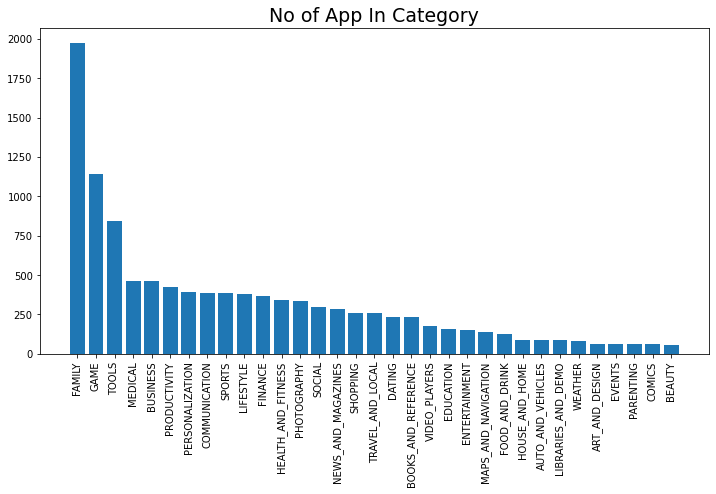

In [ ]:
plt.figure(figsize = (12,6))
plt.bar(x = num_app_category.index, height= num_app_category.values)

plt.xticks(rotation='vertical')
plt.title('No of App In Category',size=19)

plt.show()

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools

Text(0.5, 1.0, 'Rating Of App')

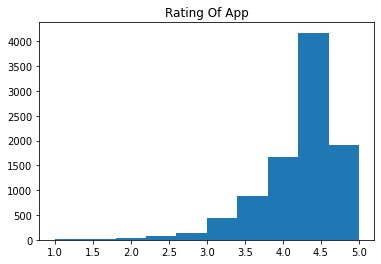

In [ ]:
# lets check the histogramical representation of 'Ratings of App'
plt.hist(x= df['Rating'])
plt.title('Rating Of App')

2. How many ratings are getting for the apps give it's relation?

Text(0.5, 1.0, 'Distribution Of Rating')

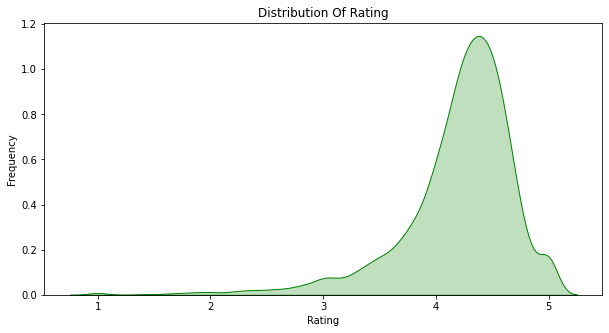

In [ ]:
# Distribution of Rating
plt.figure(figsize=(10,5))
plt.xlabel('Rating')
plt.ylabel('Frequency')

sns.kdeplot(df.Rating,color='green', shade=True)
plt.title('Distribution Of Rating')

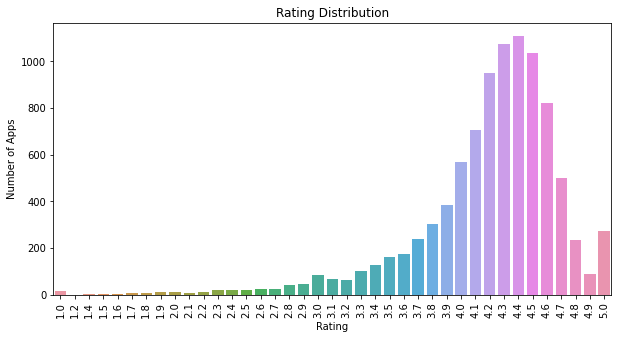

In [ ]:
# show the distribution of rating by the barplot using seaborn library
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

3. Which content rating is having higher number of apps?

In [ ]:
# now check the content rating barplot
x = df['Content Rating'].value_counts().index
y = df['Content Rating'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

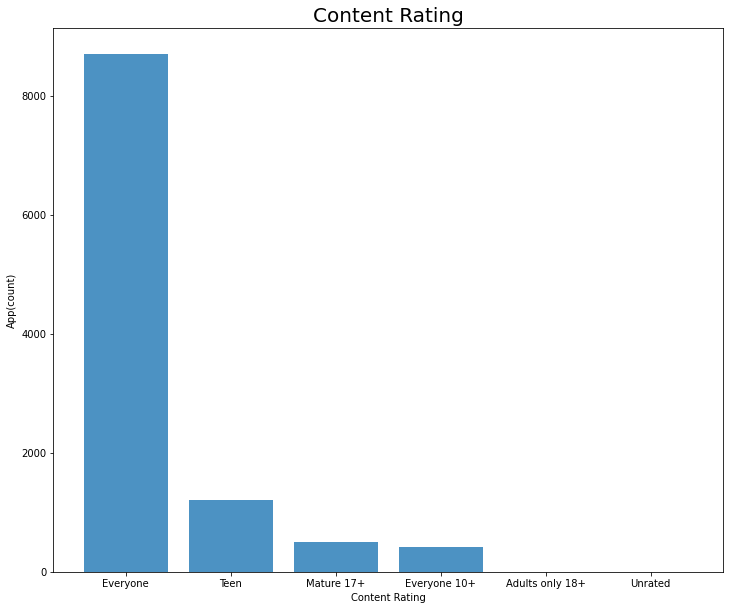

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(xsis, ysis, width=0.8,  alpha=0.8)
plt.title('Content Rating', size=20)
plt.xlabel('Content Rating')
plt.ylabel('App(count)')
plt.show()

4. Which are the top categories in Play Store?

In [ ]:
# now check the top category on Play Store by plotting barplot
y = df['Category'].value_counts().index
x = df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

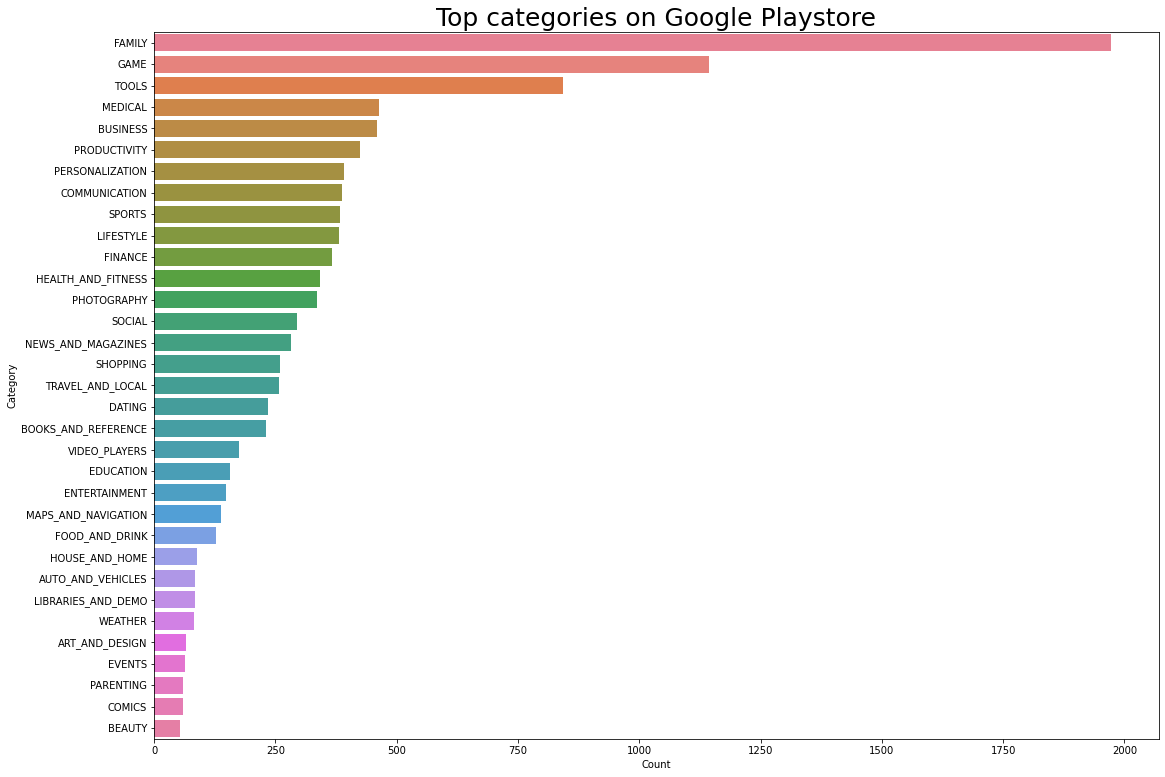

In [ ]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

5. What is percentage of the paid and free apps?

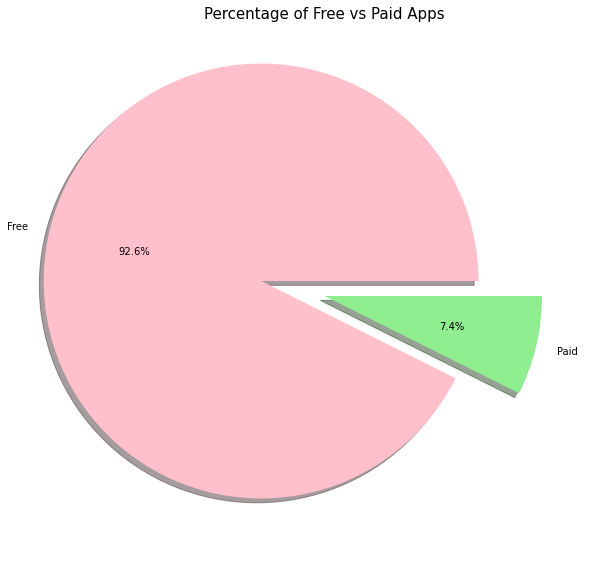

In [ ]:
# plot the pie chart showing the free vs paid app
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
size = df['Type'].value_counts(sort = True)
colors = ['pink', 'lightgreen']
explode = (0.3,0)
plt.pie(size, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0)
plt.title('Percentage of Free vs Paid Apps', size= 15)
plt.show()

6. Which are the top 10 expensive apps?

In [ ]:
# now we check the top 10 paid apps installs
top10_PaidApps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

In [ ]:
top10_PaidApps_df = top10_PaidApps[['App', 'Installs']]
top10_PaidApps_df

,App,Installs
4367,I'm Rich - Trump Edition,10000.0
5359,I am rich(premium),5000.0
5373,I AM RICH PRO PLUS,1000.0
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.0
5354,I am Rich Plus,10000.0
5351,I am rich,100000.0
5358,I am Rich!,1000.0
5362,I Am Rich Pro,5000.0
4362,💎 I'm rich,10000.0
5364,I am rich (Most expensive app),1000.0


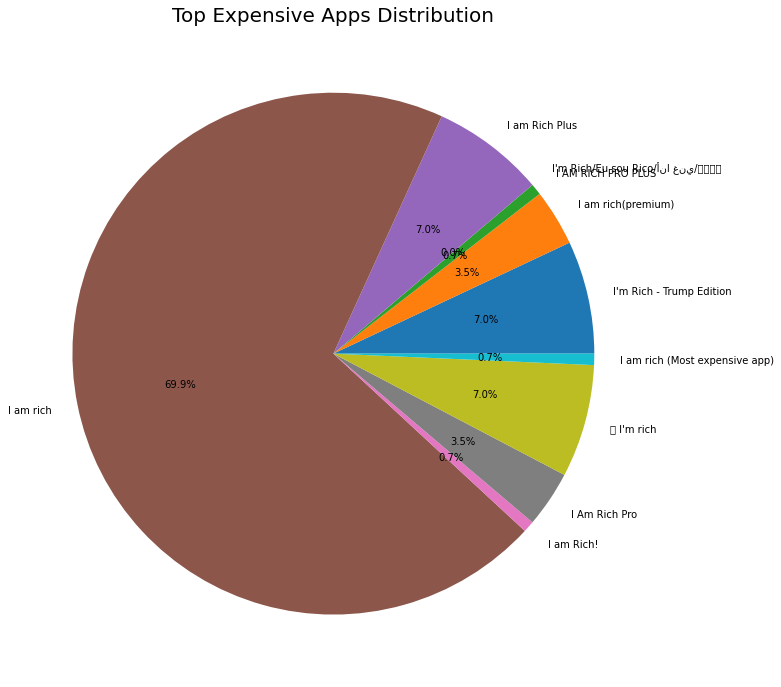

In [ ]:
# from the data we plot the pie chart of distribution of expnesive apps
plt.figure(figsize=(20,12));
plt.pie(top10_PaidApps_df.Installs, labels=top10_PaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


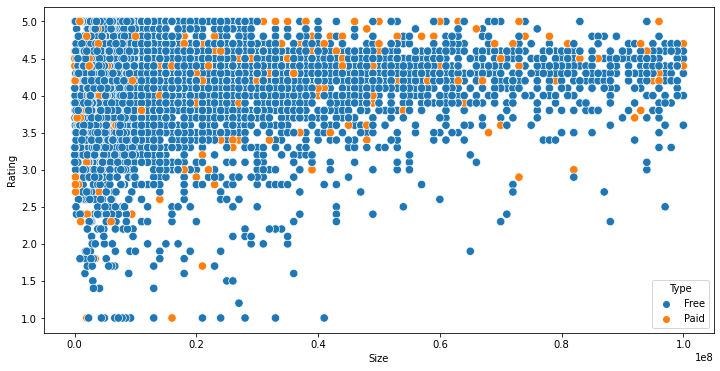

In [ ]:
# show the distribution of apps in term of their rating, size and type by scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(df['Size'], df['Rating'], hue=df['Type'], s=70)

7. What is relation between rating and it's affecting factors?

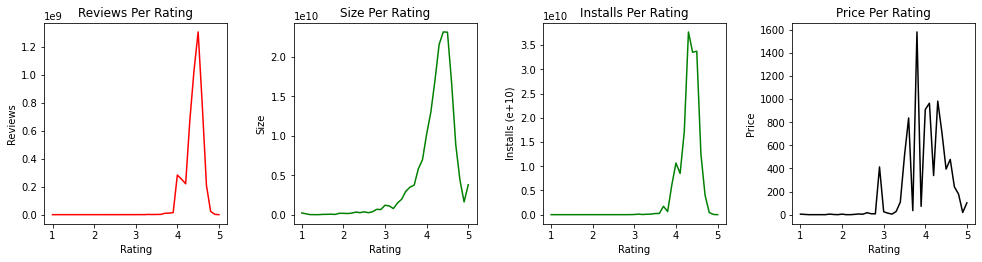

In [ ]:
# now we subplot the graph for rating per review, size, installs, and price
rating_df = df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

In [ ]:
# correlation between different column 
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068142,0.083743,0.051355,-0.021903
Reviews,0.068142,1.000000,0.238217,0.643122,-0.009668
Size,0.083743,0.238217,1.000000,0.164798,-0.023012
Installs,0.051355,0.643122,0.164798,1.000000,-0.011690
Price,-0.021903,-0.009668,-0.023012,-0.011690,1.000000


Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

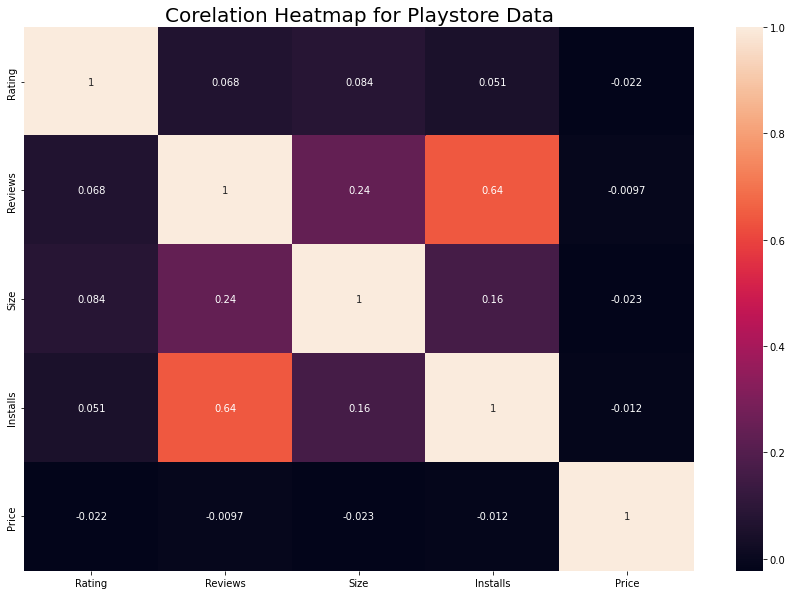

In [ ]:
# using the correlation between the different column plot the heatmap
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

8. What are the Top 10 installed apps in any category?

In [ ]:
# Top 10 installed apps in any category

def findtop10incategory(name):
    name = name.upper()
    top_10 = df[df['Category'] == name]
    top_10_apps = top_10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(15,6))
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top_10_apps.App, y = top_10_apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

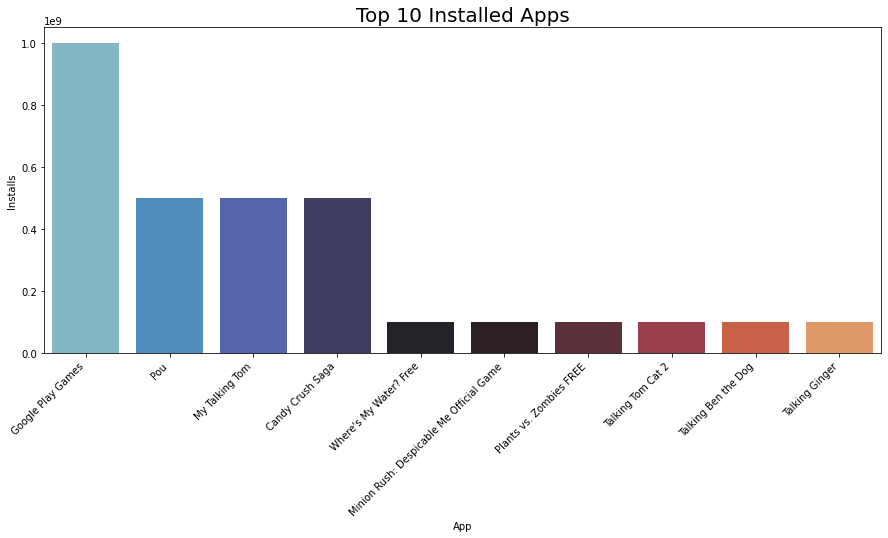

In [ ]:
findtop10incategory('FAMILY')

9. Which App has higher number of reviews?

In [ ]:
# which App has higher number of reviews?

high_rev_app = df.sort_values(by='Reviews', ascending=False).head(15)
high_rev_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social
3943,Facebook,SOCIAL,4.1,78128208,NaN,1.000000e+09,Free,0.0,Teen,Social
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1.000000e+09,Free,0.0,Everyone,Communication
2604,Instagram,SOCIAL,4.5,66577446,NaN,1.000000e+09,Free,0.0,Teen,Social
2545,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social
2611,Instagram,SOCIAL,4.5,66577313,NaN,1.000000e+09,Free,0.0,Teen,Social
3909,Instagram,SOCIAL,4.5,66509917,NaN,1.000000e+09,Free,0.0,Teen,Social
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1.000000e+09,Free,0.0,Everyone,Communication


10. Which apps giving the highest earning?

In [ ]:
# apps giving the highest earning

paid_app = df[df['Type'] == 'Paid']
earning_app = paid_app[['App','Installs','Price']]
earning_app['Earning'] = earning_app['Installs']*earning_app['Price']
earning_app_sorted = earning_app.sort_values(by='Earning', ascending=False).head(50)
earning_app_sorted_price = earning_app_sorted.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'Top Earning Apps')

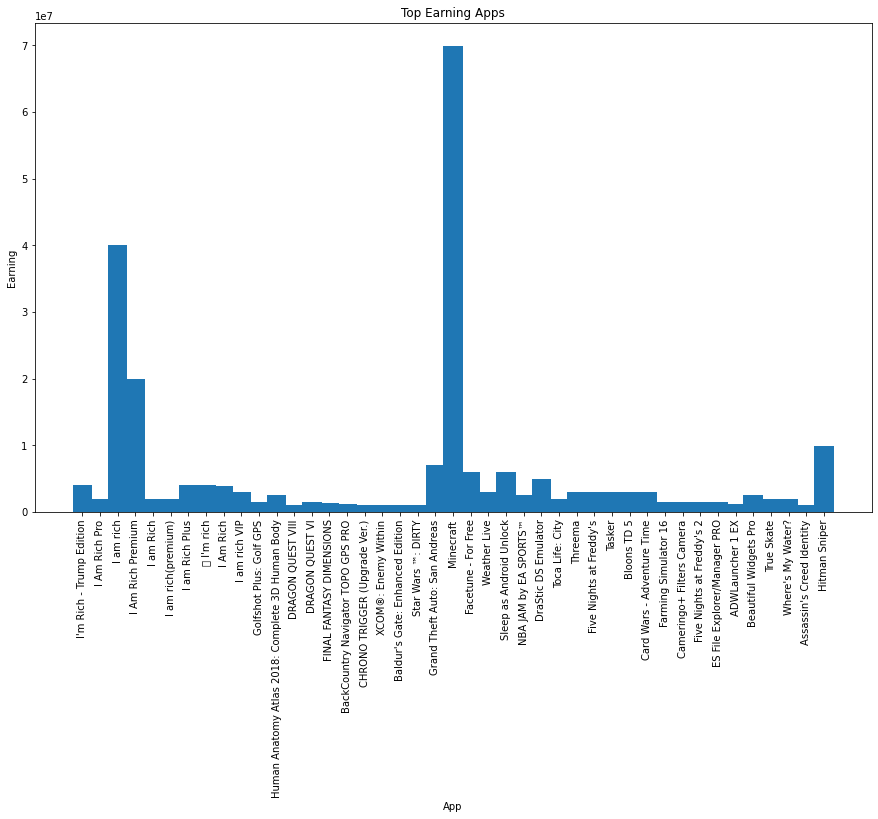

In [ ]:
# lts plot histogram of top earning apps
plt.figure(figsize =(15,9))
plt.bar(earning_app_sorted_price.App, earning_app_sorted_price.Earning, width=1.1, label= earning_app_sorted_price.Earning)
plt.xlabel('App')
plt.ylabel('Earning')
plt.xticks(rotation='vertical')
plt.title('Top Earning Apps')

11. What is average rating of the App in Playstore?

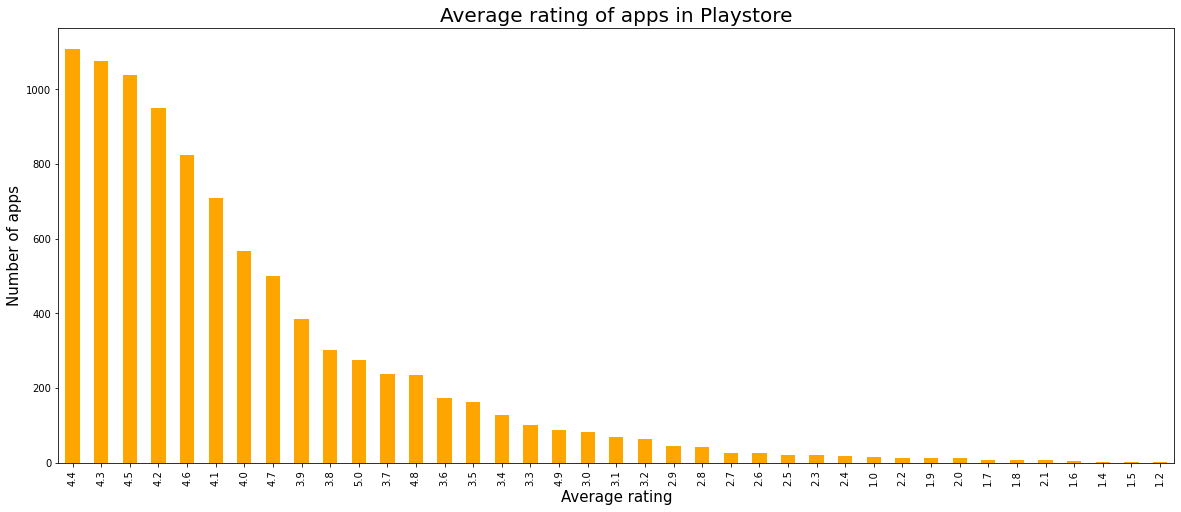

In [ ]:
# Average Rating of the App in Playstore by visualization

df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'orange' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.show()

12. From avg rating of app can we group as Top rated, Above average, Average, Below average?

We can represent the ratings in a better way if we group the ratings between certain intervals. Here, we can group the rating as follows:

4-5: Top rated, 3-4: Above average, 2-3: Average, 1-2: Below average.


In [ ]:
def Rating_app(num):
  ''''
  This function help to categories the rating from 1 to 5
  as Top_rated,Above_average,Average & below Average
  '''
  if num>=4:
    return 'Top rated'
  elif num>3 and num<4:
    return 'Above Average'
  elif num>2 and num<3:
    return 'Average'
  else:
    return 'Below Average'

In [ ]:
df['Rating_group'] = df['Rating'].apply(lambda x: Rating_app(x))

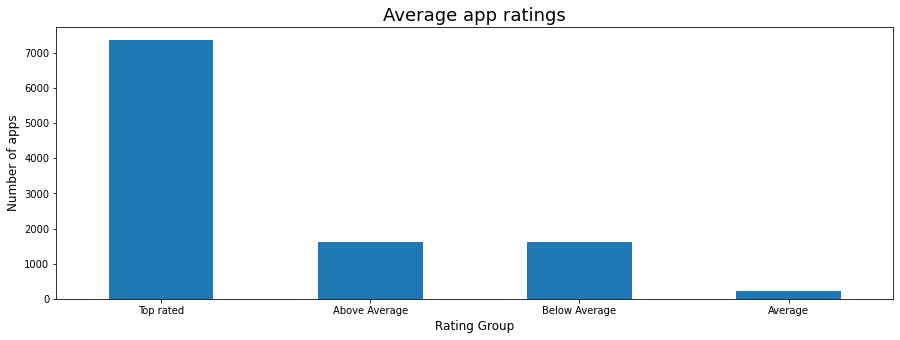

In [ ]:
df['Rating_group'].value_counts().plot.bar(figsize=(15,5),)
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 18)
plt.xticks(rotation=0)
plt.show()

# <B> Data visualization of User Reviews

13. What is percentage of the user review sentiments?

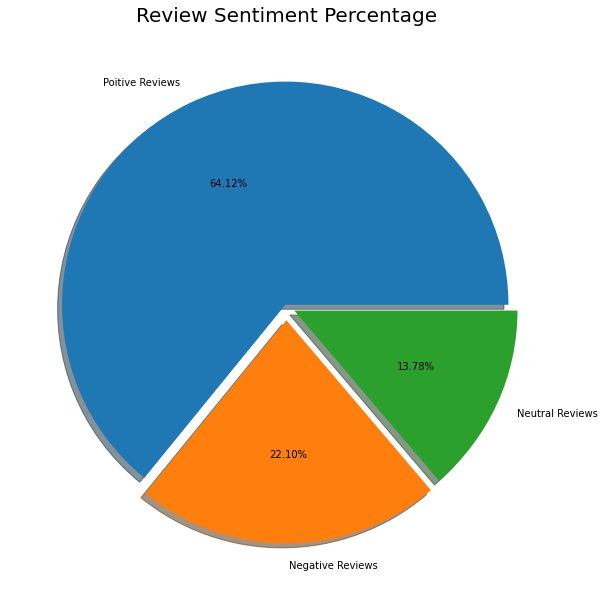

In [ ]:
# we have seen the sentiment of the reviews positve, negative and neutrals, so let plot the review sentiment percentage by pie chart

data = list(df_rev['Sentiment'].value_counts())
labels = 'Poitive Reviews', 'Negative Reviews', 'Neutral Reviews'
explode = (0.01,0.06,0.04)
plt.figure(figsize=(10,15))
plt.pie(data, labels=labels, explode=explode, shadow=True, autopct='%.2f%%' )
plt.title('Review Sentiment Percentage', size=20)
plt.show()

Here we know the reviews percentages according its sentiment.
1. Positve Reviews = 64.12%
2. Negative Reviews = 22.10%
3. Neutral Reviews = 13.78%

14. Which app has higher number of positive review?

In [ ]:
# App with higher no of positive reviews

positive_rev = df_rev[df_rev['Sentiment'] == 'Positive']
positive_rev

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


15. Which app has higher number of the negative review?

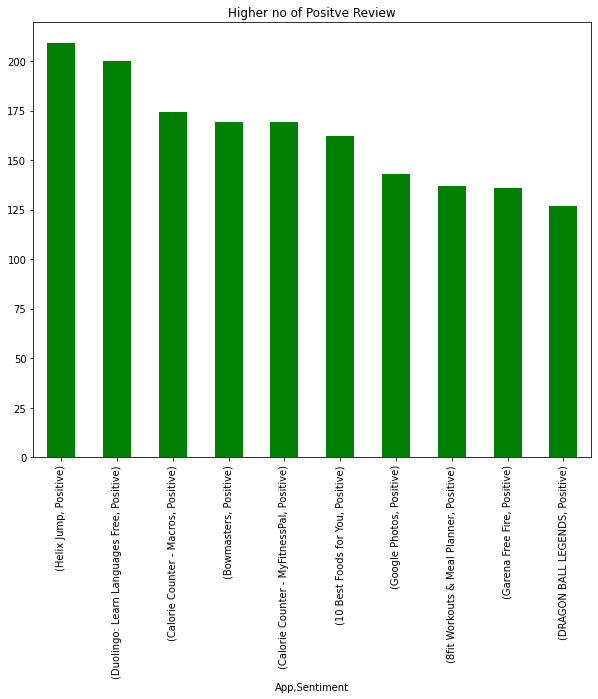

In [ ]:
# plot the graph of higher no of poitive reviews

graph = positive_rev.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(10,8), color='green')
plt.title('Higher no of Positve Review');
plt.show()

In [ ]:
# app with the highest negative reviews
negative_rev = df_rev[df_rev['Sentiment'] == 'Negative']
negative_rev

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


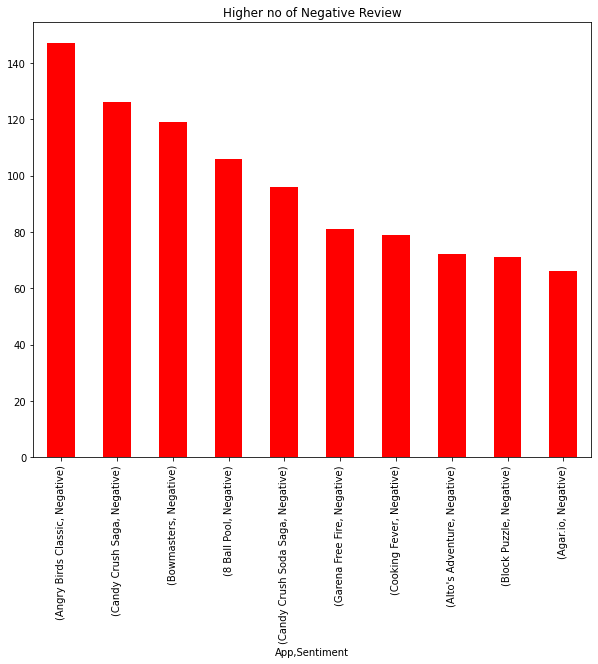

In [ ]:
# plot the barplot of higher no of negative reviews
graph = negative_rev.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.bar(figsize=(10,8), color='red')
plt.title('Higher no of Negative Review');
plt.show()

# Conclusion

We have seen from the Exploratory data analysis that the 'family', 'game' 'tools', 'medical' this are the top category apps hence it is mostly used app.

And the most number of that install is free approximetly 96.6%, and paid is just 7.4%

The review sentiments are showing the what reviews are getting for the app whether the app is good for the user perspective it show the sentiment of the users. Like in this data we have Positve Reviews = 64.12%, Negative Reviews = 22.10%, Neutral Reviews = 13.78%.